# Make a Machine Learning model to predict the weather in the next 24 hours


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
weather= pd.read_csv('weather delhi.csv')
weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Data Analysis

# Here we are going to consider only few of the columns which seems important for us to perform some basic EDA and time series prediction's point of view.

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

# Let's rename few columns for our better understanding

In [5]:
weather.columns = map(lambda x: x.strip(), weather.columns)

In [6]:
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
_dewptm,100369.0,15.741205,7.058587,-24.0,10.0,15.0,22.0,75.0
_fog,100990.0,0.069690,0.254625,0.0,0.0,0.0,0.0,1.0
_hail,100990.0,0.000129,0.011345,0.0,0.0,0.0,0.0,1.0
_heatindexm,29155.0,35.651710,5.015384,26.8,31.7,35.1,39.2,73.6
_hum,100233.0,57.909481,23.807771,4.0,39.0,59.0,78.0,243.0
_precipm,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_pressurem,100758.0,1932.330949,318378.642492,-9999.0,1002.0,1008.0,1014.0,101061443.0
_rain,100990.0,0.026260,0.159908,0.0,0.0,0.0,0.0,1.0
_snow,100990.0,0.000010,0.003147,0.0,0.0,0.0,0.0,1.0
_tempm,100317.0,25.451269,8.482859,1.0,19.0,27.0,32.0,90.0


In [7]:
weather.nunique()

datetime_utc    100990
_conds              39
_dewptm             51
_fog                 2
_hail                2
_heatindexm        193
_hum               100
_precipm             0
_pressurem         139
_rain                2
_snow                2
_tempm              50
_thunder             2
_tornado             2
_vism               48
_wdird              63
_wdire              17
_wgustm             22
_windchillm         20
_wspdm              90
dtype: int64

In [8]:
weather=weather.drop(['_heatindexm','_precipm','_wgustm','_windchillm','_wdire'],axis=1)
weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0


In [9]:
weather.isnull().sum()

datetime_utc        0
_conds             72
_dewptm           621
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wspdm           2358
dtype: int64

In [10]:
weather.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm'],
      dtype='object')

# Let's convert datatype of datetime column

In [11]:
def extract_year(value):
    return (value[0:4])
def extract_month(value):
    return (value[4:6])

In [12]:
weather["year"] = weather['datetime_utc'].apply(lambda x:extract_year(x))
weather["month"] = weather['datetime_utc'].apply(lambda x:extract_month(x))

In [13]:
weather.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11


In [14]:
weather=weather.drop(['datetime_utc'],axis=1)
weather.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month
0,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,NaN,1996,11
2,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,NaN,1996,11
3,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,NaN,1996,11
4,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11


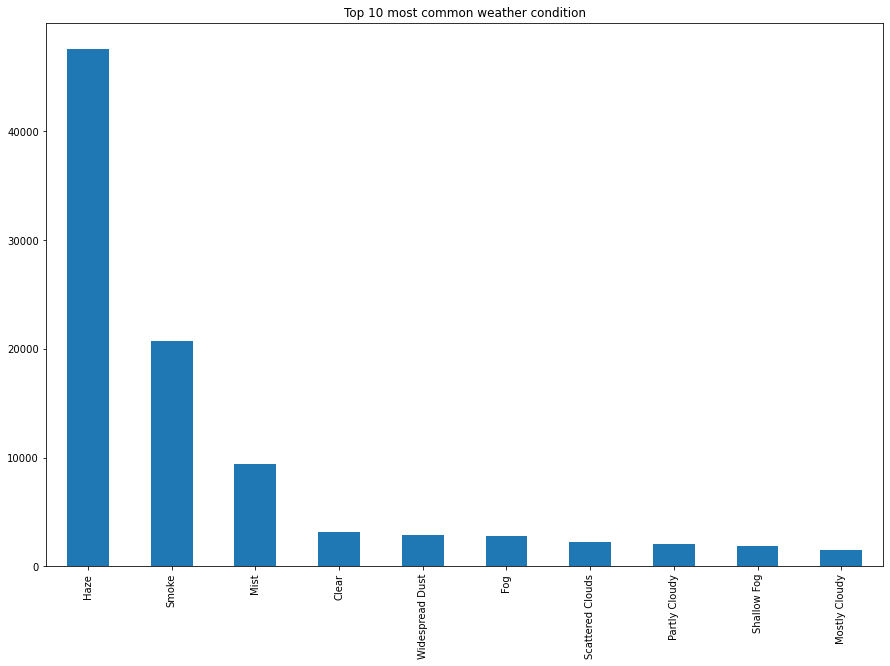

In [15]:
plt.figure(figsize=(15, 10));
weather._conds.value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();


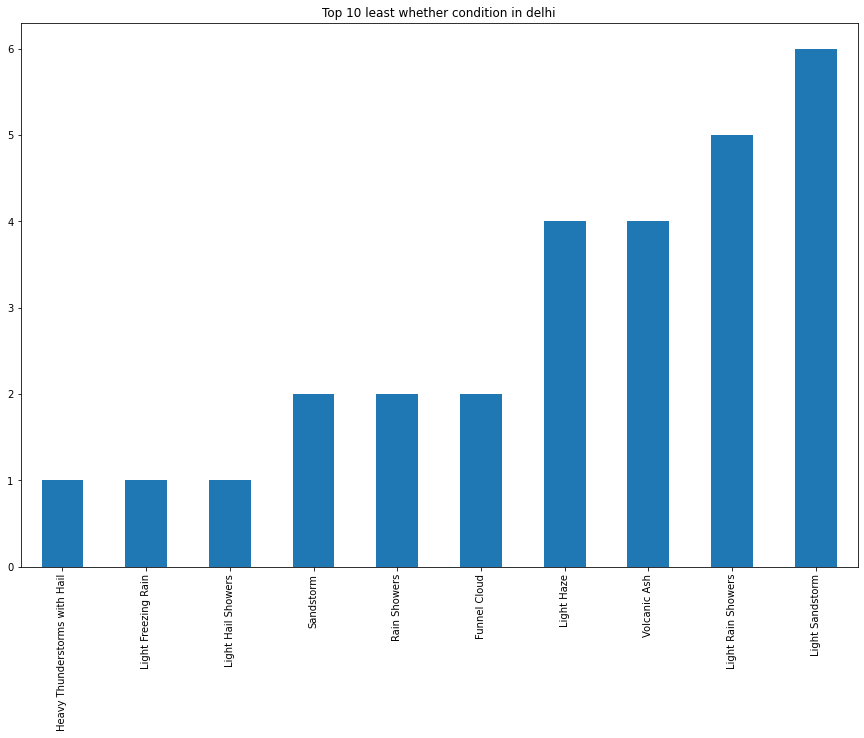

In [16]:
plt.figure(figsize=(15, 10));
weather._conds.value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

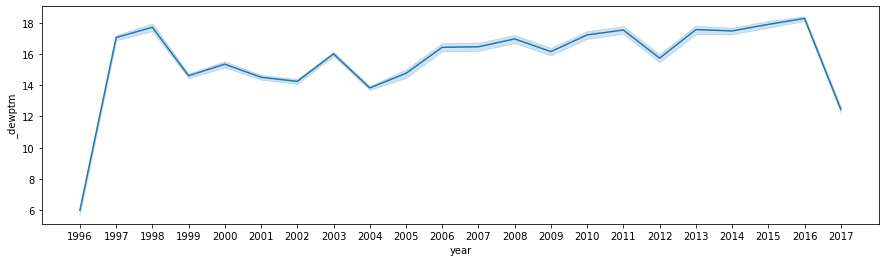

In [17]:
plt.figure(figsize=(15,4));
p = sns.lineplot(x="year", y="_dewptm", data=weather)


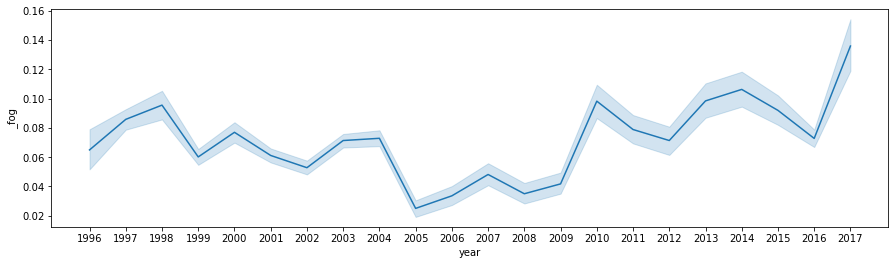

In [18]:
plt.figure(figsize=(15,4));
p = sns.lineplot(x="year", y="_fog", data=weather)

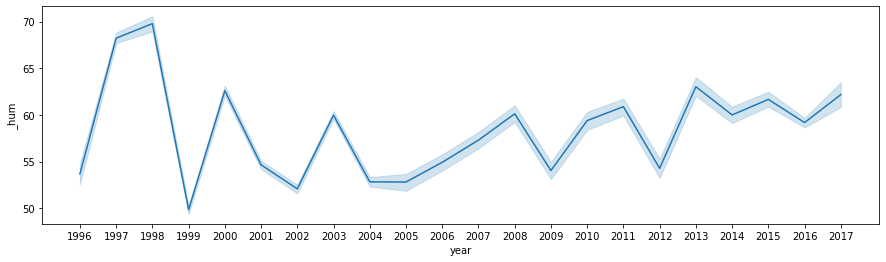

In [19]:
plt.figure(figsize=(15,4));
p = sns.lineplot(x="year", y="_hum", data=weather)


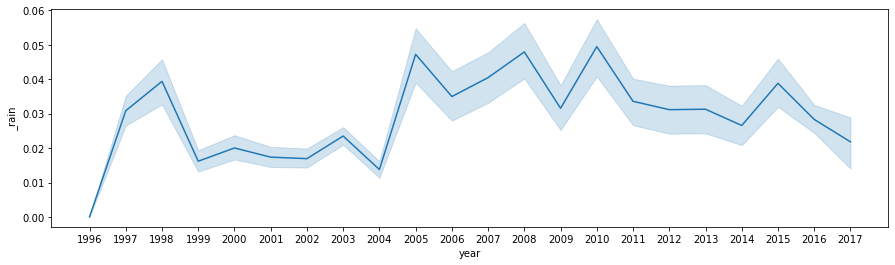

In [20]:
plt.figure(figsize=(15,4));
p = sns.lineplot(x="year", y="_rain", data=weather)


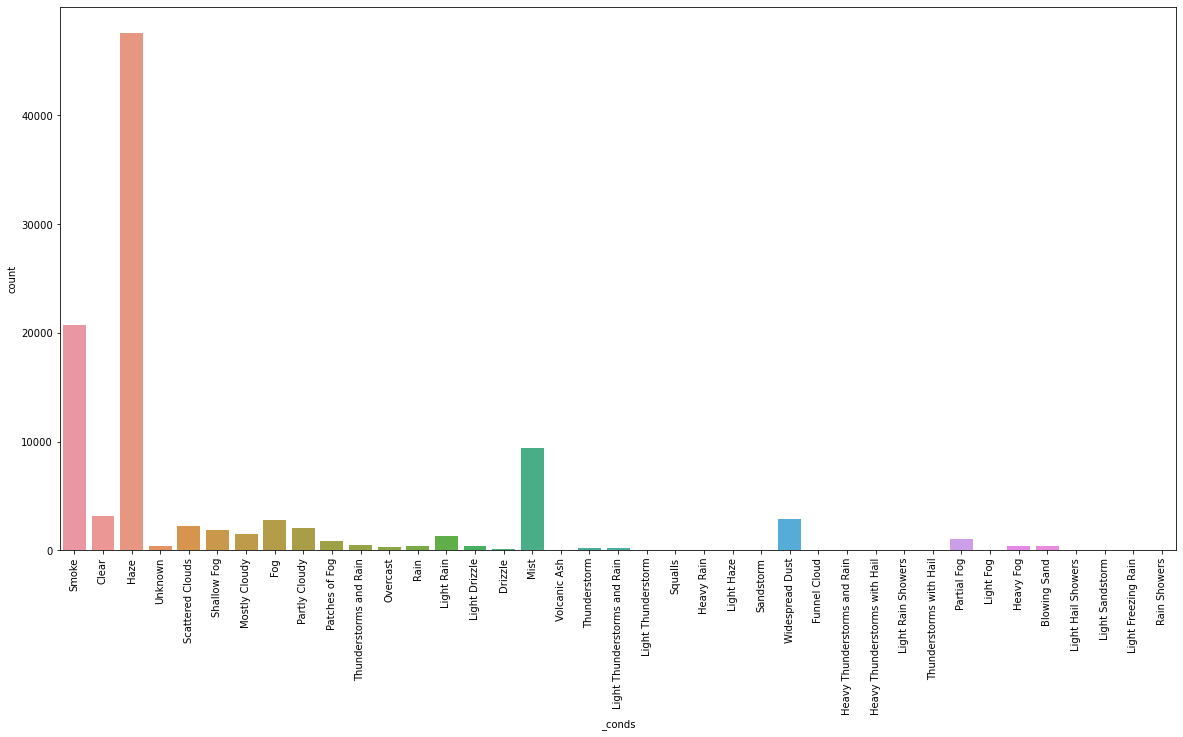

In [21]:
plt.figure(figsize=(20, 10))
p = sns.countplot(x='_conds', data=weather)
_ = plt.setp(p.get_xticklabels(), rotation=90)


# Look at the above plot, it is really so bad that mostly Delhi has Hazy and Smoky weather conditions, it shows the level of pollution city has.


In [22]:
weather['_conds'].value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

In [23]:
weather.nunique()

_conds         39
_dewptm        51
_fog            2
_hail           2
_hum          100
_pressurem    139
_rain           2
_snow           2
_tempm         50
_thunder        2
_tornado        2
_vism          48
_wdird         63
_wspdm         90
year           22
month          12
dtype: int64

In [25]:
weather.ffill(inplace=True)

In [26]:
weather.isnull().sum()

_conds        0
_dewptm       0
_fog          0
_hail         0
_hum          0
_pressurem    0
_rain         0
_snow         0
_tempm        0
_thunder      0
_tornado      0
_vism         0
_wdird        0
_wspdm        0
year          0
month         0
dtype: int64

In [27]:
X = weather.iloc[:, 1:-1].values
X.shape

(100990, 14)

In [28]:
y = weather.iloc[:, -1].values
y.shape

(100990,)

# Train & Test Split

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)


In [31]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 14)
Shape of X_test (25248, 14)
Shape of y_train (75742,)
Shape of y_test (25248,)


# Create Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [33]:
model1= LinearRegression().fit(X_train,y_train)

In [34]:
print('%.1f%%'%(model1.score(X_train,y_train)*100))
print('%.1f%%'%(model1.score(X_test,y_test)*100))


6.9%
6.3%


In [35]:
model2=  LogisticRegression().fit(X_train,y_train)


C:\Users\UTKARSH SINGH RATHOR\OneDrive\Documents\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print('%.1f%%'%(model2.score(X_train,y_train)*100))
print('%.1f%%'%(model2.score(X_test,y_test)*100))

18.1%
17.5%


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
print('%.1f%%'%(clf.score(X_train,y_train)*100))
print('%.1f%%'%(clf.score(X_test,y_test)*100))


99.8%
60.3%


In [41]:
y_pred = clf.predict(X_test)
y_pred

array(['05', '08', '12', ..., '07', '09', '12'], dtype=object)

In [42]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)


DecisionTrees's Accuracy:  60.30180608365019
